In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df_orders = pd.read_csv('olist_orders_dataset.csv')
    df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
    print("Dosyalar başarıyla yüklendi.")
except FileNotFoundError:
    print("Dosya bulunamadı. Lütfen dosyaları aynı dizinde yerleştirin.")

Dosyalar başarıyla yüklendi.


In [ ]:
print("\n--- 'Orders' Tablosu İlk 3 Satır ---")
print(df_orders.head(3))

print("\n--- 'Reviews' Tablosu İlk 3 Satır ---")
print(df_reviews.head(3))


--- 'Orders' Tablosu İlk 3 Satır ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  

--- 'Reviews' Tabl

In [ ]:
df_merged = pd.merge(df_orders, df_reviews, on='order_id')

print("\n--- BİRLEŞTİRİLMİŞ (MERGED) TABLO ---")
print(f"Orders tablosunda {len(df_orders)} satır vardı.")
print(f"Reviews tablosunda {len(df_reviews)} satır vardı.")
print(f"Yeni birleşmiş tabloda {len(df_merged)} satır var.")

print("\n--- Birleşmiş Tablonun İlk 3 Satırı ---")
print(df_merged.head(3))

print("\n--- Birleşmiş Tablonun Sütunları ---")
print(df_merged.info())


--- BİRLEŞTİRİLMİŞ (MERGED) TABLO ---
Orders tablosunda 99441 satır vardı.
Reviews tablosunda 99224 satır vardı.
Yeni birleşmiş tabloda 99224 satır var.

--- Birleşmiş Tablonun İlk 3 Satırı ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

In [ ]:
tarih_sutunlari = [
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in tarih_sutunlari:
    df_merged[col] = pd.to_datetime(df_merged[col], errors='coerce')

print("--- Tarih sütunları 'datetime' formatına çevrildi. ---")

# Gerçekleşen Kargo Süresi
df_merged['delivery_time_days'] = (df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']).dt.days

# Tahmini Kargo Süresi
df_merged['estimated_time_days'] = (df_merged['order_estimated_delivery_date'] - df_merged['order_purchase_timestamp']).dt.days

# Gecikme Durumunu Hesapla
df_merged['delivery_delta_days'] = df_merged['estimated_time_days'] - df_merged['delivery_time_days']

print("Yeni özellikler (delivery_time_days, delivery_delta_days) hesaplandı.")


# Temizlik
df_merged = df_merged.dropna(subset=['review_score', 'delivery_delta_days'])
print(f"Boş satırlar temizlendi, analiz için {len(df_merged)} adet temiz satır kaldı.")

print("\n--- Yeni Özelliklerin İstatistikleri ---")
df_merged['review_score'] = df_merged['review_score'].astype(int)

print(df_merged[['review_score', 'delivery_time_days', 'delivery_delta_days']].describe())

--- Tarih sütunları 'datetime' formatına çevrildi. ---
Yeni özellikler (delivery_time_days, delivery_delta_days) hesaplandı.
Boş satırlar temizlendi, analiz için 96359 adet temiz satır kaldı.

--- Yeni Özelliklerin İstatistikleri ---
       review_score  delivery_time_days  delivery_delta_days
count  96359.000000        96359.000000         96359.000000
mean       4.155554           12.058957            11.320842
std        1.285108            9.463076            10.124456
min        1.000000            0.000000          -189.000000
25%        4.000000            6.000000             7.000000
50%        5.000000           10.000000            12.000000
75%        5.000000           15.000000            16.000000
max        5.000000          208.000000           146.000000


Toplam 96359 satır vardı, grafiğin okunaklı olması için 93848 satır kullanılıyor.


/tmp/ipython-input-1093236071.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Grafik 'review_score_vs_delivery_delta.png' adıyla başarıyla kaydedildi.


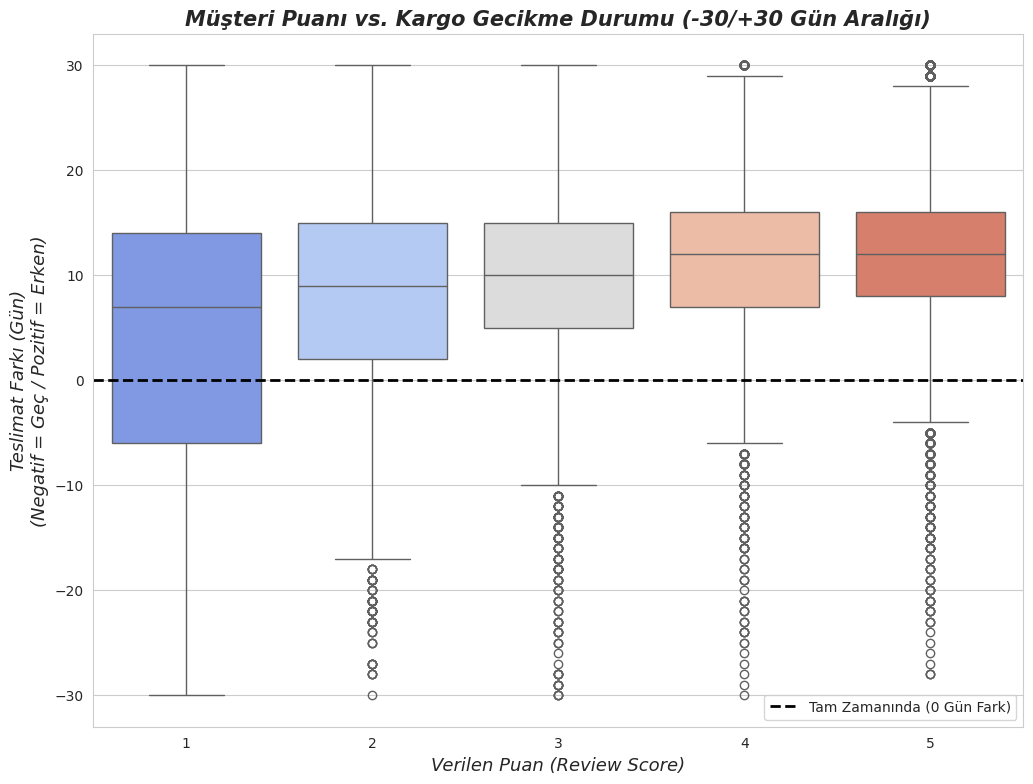

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

df_filtered_for_viz = df_merged[
    (df_merged['delivery_delta_days'] >= -30) &
    (df_merged['delivery_delta_days'] <= 30)
]

print(f"Toplam {len(df_merged)} satır vardı, grafiğin okunaklı olması için {len(df_filtered_for_viz)} satır kullanılıyor.")

plt.figure(figsize=(12, 9))

sns.boxplot(
    x='review_score',
    y='delivery_delta_days',
    data=df_filtered_for_viz,
    palette='coolwarm'
)

plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Tam Zamanında (0 Gün Fark)')

plt.title('Müşteri Puanı vs. Kargo Gecikme Durumu (-30/+30 Gün Aralığı)', fontsize=15, fontweight='bold', fontstyle='italic')
plt.xlabel('Verilen Puan (Review Score)', fontsize=13, fontstyle='italic')
plt.ylabel('Teslimat Farkı (Gün)\n(Negatif = Geç / Pozitif = Erken)', fontsize=13, fontstyle='italic')
plt.legend()

plt.savefig('review_score_vs_delivery_delta.png', dpi=300, bbox_inches='tight')

print("Grafik 'review_score_vs_delivery_delta.png' adıyla başarıyla kaydedildi.")

**Yorum 1** =
1.   **Genel Eğilim**:
   Müşteri puanı yükseldikçe, teslimat farkı (gün) pozitif yönde artıyor.
Yani yüksek puan veren müşteriler genellikle ürünlerini erken veya tam zamanında almışlar.
Bu, teslimat süresinin müşteri memnuniyeti üzerinde doğrudan ve güçlü bir etkisi olduğunu gösteriyor.
2.   **Dikkat edilmesi gereken nokta** (***Düşük Puanlar***):
   Teslimat farkı dağılımı oldukça geniş, yani müşteriler ürünleri hem geç hem
erken teslim almışlar. Medyan değer ise sıfıra yakın ve hafif pozitif olsa da puan yine de düşük kalmış. Bu durum düşük puanların sadece teslimat süresi nedeniyle değil, grafikten okuyamadığımız farklı nedenlerden de etkilendiğini düşündürüyor.

